In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns

In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading the data into Pandas**

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sickness_table.csv",index_col='date')

In [ ]:
df1.head()

,Unnamed: 0,n_sick,calls,n_duty,n_sby,sby_need,dafted
date,,,,,,,
2016-04-01,0,73,8154.0,1700,90,4.0,0.0
2016-04-02,1,64,8526.0,1700,90,70.0,0.0
2016-04-03,2,68,8088.0,1700,90,0.0,0.0
2016-04-04,3,71,7044.0,1700,90,0.0,0.0
2016-04-05,4,63,7236.0,1700,90,0.0,0.0


In [ ]:
df1.loc["2017-01-01":"2018-1-30"]

,Unnamed: 0,n_sick,calls,n_duty,n_sby,sby_need,dafted
date,,,,,,,
2017-01-01,275,60,6336.0,1800,90,0.0,0.0
2017-01-02,276,70,8550.0,1800,90,0.0,0.0
2017-01-03,277,74,8238.0,1800,90,0.0,0.0
2017-01-04,278,76,7902.0,1800,90,0.0,0.0
2017-01-05,279,76,8268.0,1800,90,0.0,0.0
...,...,...,...,...,...,...,...
2018-09-26,908,104,8364.0,1900,90,0.0,0.0
2018-09-27,909,106,7800.0,1900,90,0.0,0.0
2018-09-28,910,114,7278.0,1900,90,0.0,0.0


**Preparing the data for Machine Learning**

In [ ]:
df1.columns

Index(['Unnamed: 0', 'n_sick', 'calls', 'n_duty', 'n_sby', 'sby_need',
       'dafted'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, 2016-04-01 to 2019-05-27
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1152 non-null   int64  
 1   n_sick      1152 non-null   int64  
 2   calls       1152 non-null   float64
 3   n_duty      1152 non-null   int64  
 4   n_sby       1152 non-null   int64  
 5   sby_need    1152 non-null   float64
 6   dafted      1152 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 104.3+ KB


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df1.isnull().sum()   # Checking for Null values. We do not have any Null values.

Unnamed: 0    0
n_sick        0
calls         0
n_duty        0
n_sby         0
sby_need      0
dafted        0
dtype: int64

In [ ]:
#Keeping only related feature
df1= df1[["n_sick",'calls','n_duty','sby_need','dafted']]

**Verifying Data Types**

In [ ]:
#For Machine Learning Algorithm all the data types should be Numerical.
df1.dtypes

n_sick        int64
calls       float64
n_duty        int64
sby_need    float64
dafted      float64
dtype: object

In [ ]:
df1.index=pd.to_datetime(df1.index)

In [ ]:
df1['calls']=df1['calls'].astype(int)
df1['sby_need']=df1['sby_need'].astype(int)
df1['dafted']=df1['dafted'].astype(int)


<ipython-input-14-4cca143a7717>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['calls']=df1['calls'].astype(int)
<ipython-input-14-4cca143a7717>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sby_need']=df1['sby_need'].astype(int)
<ipython-input-14-4cca143a7717>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [ ]:
df1.dtypes

n_sick      int64
calls       int64
n_duty      int64
sby_need    int64
dafted      int64
dtype: object

In [ ]:
df1.index

DatetimeIndex(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
               '2016-04-05', '2016-04-06', '2016-04-07', '2016-04-08',
               '2016-04-09', '2016-04-10',
               ...
               '2019-05-18', '2019-05-19', '2019-05-20', '2019-05-21',
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
               '2019-05-26', '2019-05-27'],
              dtype='datetime64[ns]', name='date', length=1152, freq=None)

<Axes: xlabel='date'>

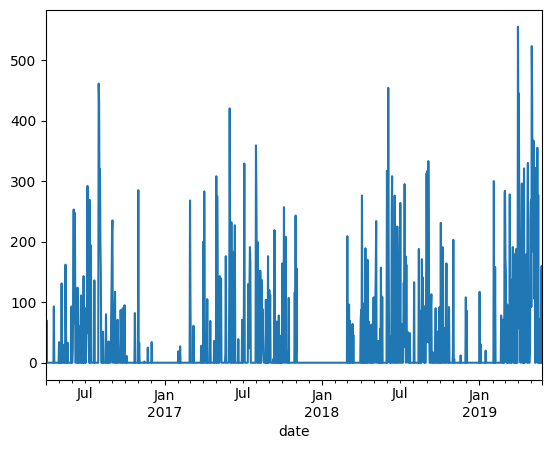

In [ ]:
df1["sby_need"].plot() # There is no any missing data

In [ ]:
df1.index.year.value_counts().sort_index() # The year 2016 and 2019 has less number of entries
# because for year 2016 the data starts from April and for the year 2019 the data is available upto the Month of May.

2016    275
2017    365
2018    365
2019    147
Name: date, dtype: int64

In [ ]:
df1.groupby(df1.index.year).sum()["n_duty"] # Number of duty drivers every year

date
2016    467500
2017    657000
2018    693500
2019    279300
Name: n_duty, dtype: int64

# ** Model 3**

In [ ]:
# Deciding the target Variable     # We are going to predict number of standbys driver needed tommorow based on the previous data.
df1['target']=df1.shift(-1)['sby_need']

In [ ]:
df1.head(3)

,n_sick,calls,n_duty,sby_need,dafted,target
date,,,,,,
2016-04-01,73,8154,1700,4,0,70.0
2016-04-02,64,8526,1700,70,0,0.0
2016-04-03,68,8088,1700,0,0,0.0


In [ ]:
df1 = df1.iloc[:-1,:].copy()       # Upto the -1 means not including the last row.

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1)

In [ ]:
predictors=['n_sick','calls','n_duty','sby_need','dafted']


In [ ]:
train = df1.loc[:"2018-09-10"]

In [ ]:
test=df1.loc["2018-09-11":]

In [ ]:
test.head()

,n_sick,calls,n_duty,sby_need,dafted,target
date,,,,,,
2018-09-11,90,9504,1900,91,1,113.0
2018-09-12,91,9606,1900,113,23,0.0
2018-09-13,97,8010,1900,0,0,0.0
2018-09-14,100,7662,1900,0,0,0.0
2018-09-15,97,7746,1900,0,0,17.0


In [ ]:
ridge_reg.fit(train[predictors],train['target'])

Ridge(alpha=0.1)

In [ ]:
ridge_reg.score(train[predictors],train['target'])
#Checking the Regression Score i.e R-squared value


0.0956011400729957

In [ ]:
predict = ridge_reg.predict(test[predictors])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(test['target'],predict )
print("MSE :" , MSE)

MSE : 9081.705938738143


In [ ]:
from sklearn.metrics import mean_absolute_error
MAE  = mean_absolute_error(test['target'],predict )
print("MAE :" , MAE)

r2_ridge = r2_score(test['target'], predict)
print("r2_ridge :",r2_ridge )

MAE : 59.5033350824416
r2_ridge : 0.13945986682352807


In [ ]:
combined = pd.concat([test['target'],pd.Series(predict,index=test.index)],axis=1)

In [ ]:
combined.columns =["Actual","Predictions"]
combined.head()

,Actual,Predictions
date,,
2018-09-11,113.0,45.255780
2018-09-12,0.0,52.208678
2018-09-13,0.0,26.411806
2018-09-14,0.0,23.280687
2018-09-15,17.0,24.051725


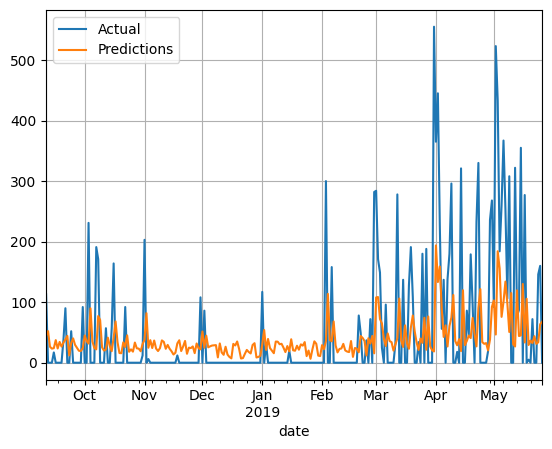

In [ ]:
combined.plot().grid()

In [ ]:
reg.coef_

array([-0.00670096,  0.0089397 , -0.01056702,  0.05740283,  0.21749487])

# **Using Linear Regression**

In [ ]:
linear_reg =LinearRegression()

In [ ]:
# Here we Train the model
linear_reg.fit(train[predictors],train['target'])

LinearRegression()

In [ ]:
linear_reg.score(train[predictors],train['target'])

0.09560114007299603

In [ ]:
predict = linear_reg.predict(test[predictors])

In [ ]:
MSE  = mean_squared_error(test['target'],predict )
print("MSE :" , MSE)

MSE : 9081.705919576896


In [ ]:
from sklearn.metrics import mean_absolute_error
MAE  = mean_absolute_error(test['target'],predict )
print("MAE :" , MAE)

MAE : 59.50333498901658


In [ ]:
r2_linear = r2_score(test['target'], predict)
print("r2 score of Linear regressor:",r2_linear)

r2 score of Linear regressor: 0.1394598686391586


# **Ridge**

In [ ]:
from sklearn.linear_model import Ridge
Rreg = Ridge(alpha=0.1)

In [ ]:
# Here we Train the model
Rreg.fit(train[predictors],train['target'])

Ridge(alpha=0.1)

In [ ]:
Rreg.score(train[predictors],train['target'])

0.0956011400729957

In [ ]:
predict = Rreg.predict(test[predictors])

In [ ]:


MSE  = mean_squared_error(test['target'],predict )
print("MSE :" , MSE)

MSE : 9081.705938738143


In [ ]:

MAE  = mean_absolute_error(test['target'],predict )
print("MAE :" , MAE)

MAE : 59.5033350824416


In [ ]:
r2_ridge = r2_score(test['target'], predict)
print("r2 score of ridge regressor:",r2_ridge)

r2 score of ridge regressor: 0.13945986682352807


# **LASSO**

In [ ]:

L1 = Lasso(alpha = 0.2, max_iter=10000,selection='cyclic', tol=0.0001,)

In [ ]:
# Here we Train the model
L1.fit(train[predictors],train['target'])

Lasso(alpha=0.2, max_iter=10000)

In [ ]:
L1.score(train[predictors],train['target'])

0.09560108612958651

In [ ]:
predict = L1.predict(test[predictors])

In [ ]:
MSE  = mean_squared_error(test['target'],predict )
print("MSE :" , MSE)

MSE : 9081.740722286335


In [ ]:
MAE  = mean_absolute_error(test['target'],predict )
print("MAE :" , MAE)

MAE : 59.508497470225535


In [ ]:
r2_lasso = r2_score(test['target'], predict)
print("r2 score of Lasso regressor:",r2_lasso)

r2 score of Lasso regressor: 0.13945657089659602


# **Decision Tree**

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
# Here we Train the model
decision_tree.fit(train[predictors],train['target'])
decision_tree.score(train[predictors],train['target'])
predict = decision_tree.predict(test[predictors])
MSE  = mean_squared_error(test['target'],predict )
print("MSE :" , MSE)

MAE  = mean_absolute_error(test['target'],predict )
print("MAE :" , MAE)

r2_dt = r2_score(test['target'], predict)
print("r2 score of decision tree regressor:",r2_dt)

MSE : 9558.977762779621
MAE : 61.57498679714829
r2 score of decision tree regressor: 0.0942358129076073


# **Random** **Forest**

In [ ]:
# Create a random forest regressor with n_estimators=500, max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)


# Here we Train the model
random_forest.fit(train[predictors],train['target'])
random_forest.score(train[predictors],train['target'])
predict = random_forest.predict(test[predictors])
MSE  = mean_squared_error(test['target'],predict )
print("MSE :" , MSE)

MAE  = mean_absolute_error(test['target'],predict )
print("MAE :" , MAE)

r2_rf = r2_score(test['target'], predict)
print("r2 score of Random forest regressor:",r2_lasso)

MSE : 9582.439177925005
MAE : 62.66226300021475
r2 score of Random forest regressor: 0.13945657089659602


# **AdaBoostRegressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01)
# Here we Train the model
adaboost.fit(train[predictors],train['target'])
adaboost.score(train[predictors],train['target'])
predict = adaboost.predict(test[predictors])
MSE  = mean_squared_error(test['target'],predict )
print("MSE :" , MSE)

MAE  = mean_absolute_error(test['target'],predict )
print("MAE :" , MAE)

r2_adaboost = r2_score(test['target'], predict)
print("r2 score of adaboost regressor:",r2_adaboost)

MSE : 9189.270934388745
MAE : 71.72870991772871
r2 score of adaboost regressor: 0.1292675090983717


# **XGBRegressor**

In [ ]:
import xgboost as xgb

xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
# Here we Train the model
xgboost.fit(train[predictors],train['target'])
xgboost.score(train[predictors],train['target'])
predict = xgboost.predict(test[predictors])
MSE  = mean_squared_error(test['target'],predict )
print("MSE :" , MSE)

MAE  = mean_absolute_error(test['target'],predict )
print("MAE :" , MAE)

r2_xgb = r2_score(test['target'], predict)
print("r2 score of XGB regressor:",r2_xgb)


MSE : 12118.596742941525
MAE : 69.5354748691926
r2 score of XGB regressor: -0.14830175359452902


****